In [1]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [2]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

Start by fitting a ridge regressor (sklearn.linear_model.Ridge) fixing the penalty alpha to 0 to not regularize the model. Use a 10-fold cross-validation and pass the argument return_estimator=True in sklearn.model_selection.cross_validate to access all fitted estimators fitted on each fold. As discussed in the previous notebooks, use an instance of sklearn.preprocessing.StandardScaler to scale the data before passing it to the regressor.

## Question 1 
How large is the largest absolute value of the weight (coefficient) in this trained model?

Hint: Note that the estimator fitted in each fold of the cross-validation procedure is a pipeline object. To access the coefficients of the Ridge model at the last position in a pipeline object, you can use the expression pipeline[-1].coef_ for each pipeline object fitted in the cross-validation procedure. The -1 notation is a negative index meaning "last position".

In [3]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), Ridge(alpha=0))

cv = cross_validate(model, data_numerical, target, cv=10, return_estimator = True)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.14082e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48388e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.80818e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.08256e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

In [4]:
estimators = cv['estimator']

In [5]:
max_coef_found = 0

for i, estimator in enumerate(estimators):
    coef = estimator[-1].coef_
    abs_coef = abs(coef)
    max_coef = abs_coef.max()
    if max_coef > max_coef_found:
        max_coef_found = max_coef
        print(f"New maximum coeficient found on fold {i}: {max_coef}")

New maximum coeficient found on fold 0: 45690.25251333434
New maximum coeficient found on fold 1: 70917.45153078093
New maximum coeficient found on fold 3: 70967.28610646982
New maximum coeficient found on fold 4: 101980.32388613015
New maximum coeficient found on fold 5: 181991.55832390764
New maximum coeficient found on fold 7: 1.6389466663127233e+19


In [6]:
## Another way to solve the problem

## The following code creates a predictive pipeline using a linear regression as a predictor. 
## It is then evaluated using cross-validation evaluation.
## The coefficients can be found by inspecting the last step of each fitted pipeline stored in 
## the key "estimator" from the dictionary returned by cross_validate.

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), Ridge(alpha=0))
cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)
coefs = [pipeline[-1].coef_ for pipeline in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.14082e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48388e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.80818e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.08256e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-2150.565785,493.494153,4637.694639,-4.969873e+18,-1.770471e+18,-4.778107e+18,-4.361649e+18,-1.204271e+19,-1.361257e+19,-1.550650e+18,...,2126.014179,13060.388106,-9192.390861,3292.210973,632.900594,-6812.089922,-686.497923,653.470970,-5327.185780,-1049.227055
max,2684.949822,2128.420676,9086.583571,4.551274e+18,1.575327e+18,4.355752e+18,4.771449e+18,2.609555e+18,3.011876e+18,3.446615e+17,...,4069.517486,23276.774437,3949.302538,5790.611069,3128.998021,-1818.336174,1697.503301,2871.698171,567.966515,3164.376581


Here, we use coefs.describe() to compute the minimum and maximum but notice that this is not the only possible solution.

Sometimes using models without regularization (e.g. Ridge with alpha=0 or LinearRegression) can be problematic. The problem to be solved can be ill-conditioned and the coefficients can be very large (e.g. ~1e18). This is due to some numerical errors and we should not use this model in practice. A model adding some regularization should be used instead.

For visually inspecting the coefficients, you could use a boxplot:

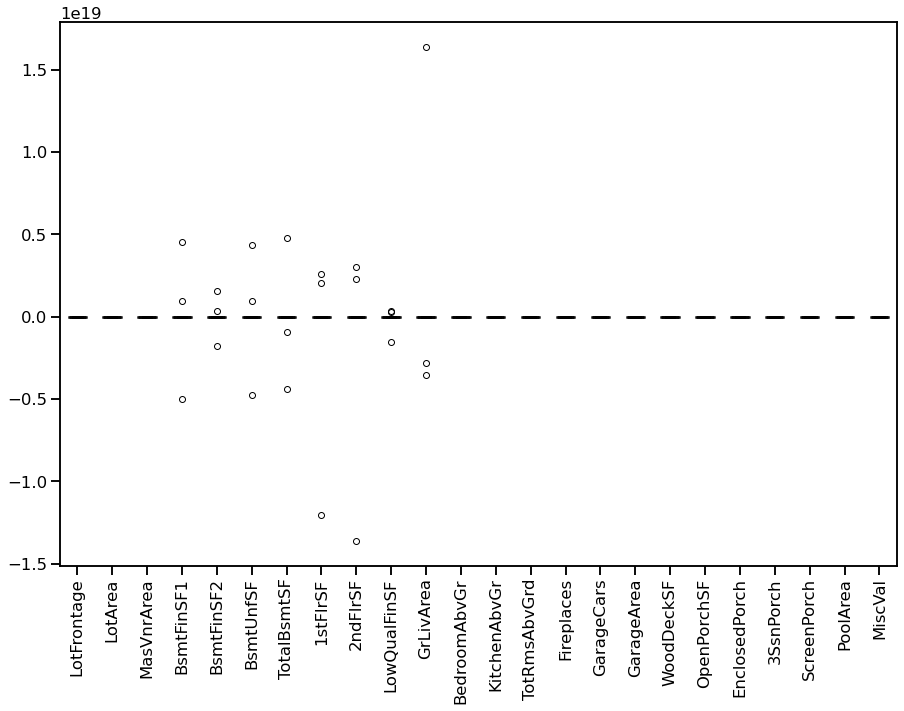

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.plot.box(**boxplot_property, ax=ax)

This plot gives us the information that some coefficients are really large (outlier dots on the plot). Notice that the scale of the y axis is huge (1e19) and the "bodies" of the boxplots are shrunk seemingly close to zero and we can only visualize the numerically unstable outliers.



 c) Larger than 100,000.0 (1e5)

## Question 2
Repeat the same experiment by fitting a ridge regressor (sklearn.linear_model.Ridge) with the default parameter (i.e. alpha=1.0).

How large is the largest absolute value of the weight (coefficient) in this trained model?

In [8]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))

cv = cross_validate(model, data_numerical, target, cv=10, return_estimator = True)

In [9]:
estimators = cv['estimator']

max_coef_found = 0

for i, estimator in enumerate(estimators):
    coef = estimator[-1].coef_
    abs_coef = abs(coef)
    max_coef = abs_coef.max()
    if max_coef > max_coef_found:
        max_coef_found = max_coef
        print(f"New maximum coeficient found on fold {i}: {max_coef}")

New maximum coeficient found on fold 0: 20867.286383259503
New maximum coeficient found on fold 5: 22562.76919825587


 b) Between 1.0 and 100,000.0 

## Question 3
What are the two most important features used by the ridge regressor? You can make a box-plot of the coefficients across all folds to get a good insight.

In [10]:
coefs = [estimator[-1].coef_ for estimator in estimators]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,-476.754038,1395.265868,7657.727958,8808.084233,-269.703768,2933.250315,11936.833677,10101.976360,11966.640153,-1560.403619,...,3343.709544,20867.286383,-1862.727463,4547.287091,2195.085772,-2102.823437,1697.856940,1685.347396,-2024.619474,378.544940
1,-1014.941352,1150.580724,6620.700545,8565.024170,-70.053229,3087.955340,11956.500135,9935.653200,11841.466887,-2770.569902,...,3230.651161,20329.015172,-2320.141348,5400.151749,1700.736001,-3120.965207,883.477224,740.771764,-1786.461511,297.451367
2,-150.876387,493.591270,6843.024664,8498.092288,-658.039034,3238.457525,11859.105753,9363.204570,11954.290467,-1691.339324,...,3340.471569,19764.507913,-1225.551540,5533.832881,1812.416635,-2642.142579,1068.534756,1956.118214,-1761.652154,-1050.602603
3,-233.390058,1968.789237,7822.622938,7967.955293,-561.667200,2709.316503,10989.135615,11243.005735,12777.655159,-1825.118416,...,2145.052452,20169.592626,-1943.885464,4447.825185,3030.459490,-2750.448784,828.462773,1596.273553,-2178.364964,303.711725
4,442.991887,1381.008329,6145.027307,7862.001820,218.607366,3240.788725,11407.896232,8664.061930,11417.665779,-1910.699121,...,3636.999322,19571.095410,320.408726,3938.958046,1973.950344,-2466.365099,982.238617,1960.759128,-1610.267541,-6.210630
5,337.586500,1280.302144,6204.965602,8604.518987,-168.769685,2228.213769,11083.678123,10854.619591,12301.406783,-1488.188974,...,3413.367678,22562.769198,-3183.723296,4835.891524,2113.457778,-2526.139845,1051.314980,1376.681166,-2244.483092,274.093027
6,-490.130594,1808.916632,6963.780573,8122.074016,358.820285,3629.729164,12190.068143,8744.488333,12782.039014,-1439.212728,...,3062.024439,20127.655974,-946.622962,5791.918839,2543.733411,-2578.047570,1548.591961,1958.297563,-1806.929258,252.541283
7,-627.947825,1325.538815,6956.567906,8081.283989,-413.641028,2405.945256,10673.168368,10824.482553,11239.374795,-1280.035931,...,3758.486675,20032.645971,-639.301222,5400.543988,2065.721831,-3391.962390,1050.305327,1611.829741,-1884.893780,313.419320
8,2813.950135,2601.096893,6467.069111,11098.319437,-619.709950,4175.634363,15693.414764,7710.687901,13642.435186,-1735.103867,...,2269.276106,11610.344076,4626.005696,3287.994032,2027.444655,-3110.866623,32.953000,1282.296379,71.092558,607.322413
9,19.595844,1675.831347,6945.154935,8134.095079,198.754703,3133.306199,11688.584625,9576.941376,12096.912771,-1482.866295,...,2670.548528,19144.189169,-80.015915,4446.456303,1493.838234,-2663.425470,293.709642,2172.624444,-2419.756875,102.347305


<AxesSubplot:>

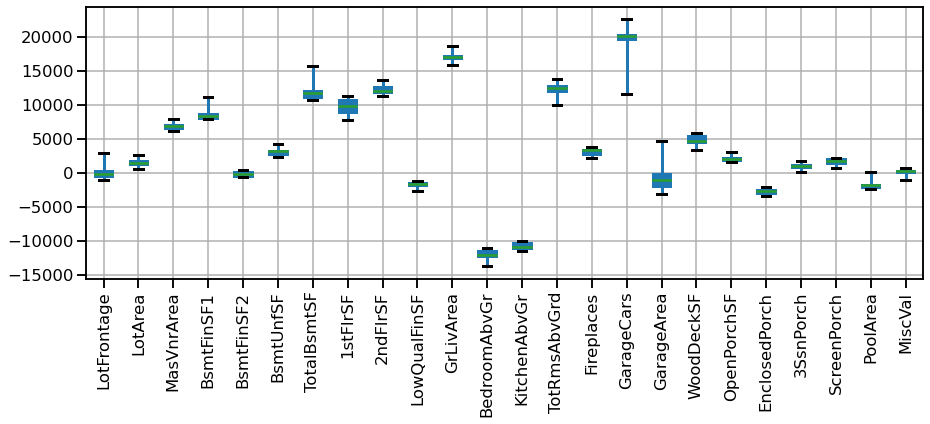

In [11]:
coefs.boxplot(rot=90, figsize=(15,5))

 b) "GarageCars" and "GrLivArea" 

## Question 4
Remove the feature "GarageArea" from the dataset and repeat the previous experiment.

What is the impact on the weights of removing "GarageArea" from the dataset?

In [12]:
data_numerical_without_garage = data_numerical.drop('GarageArea', axis=1)

In [13]:
model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))

cv_without_garage = cross_validate(model, data_numerical_without_garage, target, cv=10, return_estimator = True)

In [14]:
coefs_without_garage = [estimator[-1].coef_ for estimator in cv_without_garage['estimator']]
coefs_without_garage = pd.DataFrame(coefs_without_garage, columns=data_numerical_without_garage.columns)
coefs_without_garage

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,-581.788102,1390.212130,7605.143898,8733.007020,-271.971302,2961.429989,11886.603533,9961.687034,11953.603897,-1583.349456,...,12042.988479,3455.255574,19375.930775,4545.131576,2137.333169,-2135.467975,1718.236988,1694.502562,-2042.516877,353.531993
1,-1141.650319,1112.723707,6559.339448,8473.464671,-61.192680,3113.432434,11889.716290,9774.918842,11817.110744,-2778.365718,...,12779.533592,3391.526736,18455.992304,5389.993644,1615.675431,-3145.473422,880.075992,742.399779,-1799.414985,265.381685
2,-215.943868,472.569716,6808.527960,8442.001034,-657.838705,3256.624603,11819.237883,9285.486652,11958.682803,-1706.283522,...,12818.482757,3422.343218,18775.604732,5539.169578,1770.220707,-2664.030435,1075.498675,1954.448488,-1775.364832,-1074.078351
3,-338.299526,1957.551946,7784.927777,7866.414821,-560.415047,2731.343636,10904.797276,11123.582373,12760.085431,-1841.198148,...,10502.829463,2281.601007,18608.862582,4437.737489,2978.159897,-2793.411959,833.911262,1580.707234,-2196.126500,283.836954
4,464.028010,1379.369064,6155.370286,7875.302568,219.169014,3235.811953,11416.722119,8686.647775,11418.650500,-1907.200625,...,12286.965274,3615.322834,19829.484416,3941.040441,1983.018812,-2461.216282,980.502073,1961.464155,-1606.941192,-2.276242
5,160.368224,1257.726253,6126.242261,8476.649019,-194.032556,2270.441408,10983.031109,10665.238065,12277.348797,-1521.158506,...,10037.220929,3625.080080,19963.351138,4806.370026,1988.218168,-2578.329923,1057.230371,1353.695788,-2298.597947,242.683367
6,-550.908326,1806.022932,6933.780422,8083.088578,364.283906,3645.473667,12167.202974,8677.861044,12779.462365,-1446.322120,...,12118.590717,3122.771144,19367.131900,5785.339784,2511.087801,-2596.285597,1549.071021,1956.379891,-1816.026405,242.654240
7,-665.995214,1321.183044,6939.743171,8055.870947,-416.751629,2415.272182,10654.884244,10779.337014,11235.731784,-1282.807241,...,12520.448896,3803.488159,19515.985784,5397.364228,2043.916326,-3403.482187,1058.665438,1610.759317,-1892.048672,307.538072
8,3050.032793,2616.701180,6593.598397,11242.508045,-595.426582,4125.676888,15799.183845,7995.512456,13640.660824,-1668.003969,...,12841.051013,1948.754914,15404.159197,3299.396352,2205.759919,-3026.555006,23.532153,1271.649703,57.255505,654.503711
9,15.293672,1675.615426,6943.163583,8130.424649,198.683125,3134.223729,11685.645057,9571.685469,12096.835697,-1483.397346,...,13816.022945,2675.846503,19079.743564,4446.232977,1491.390358,-2664.092949,293.774892,2172.345807,-2421.570766,101.278466


<AxesSubplot:>

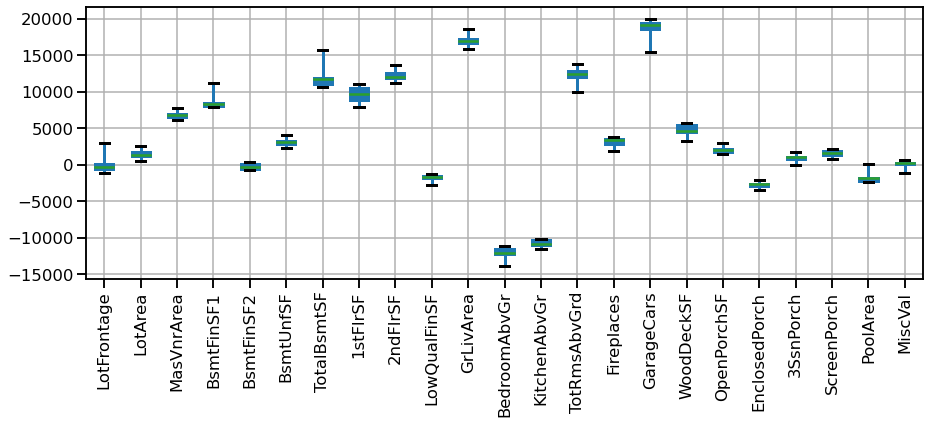

In [15]:
coefs_without_garage.boxplot(rot=90, figsize=(15,5))

In [16]:
coefs.GarageCars.std()

2895.2876461017145

In [17]:
coefs_without_garage.GarageCars.std()

1305.139394188659

 c) Decreases the standard deviation (across CV folds) of the "GarageCars" coefficient

## Question 5
What is the main reason for observing the previous impact on the most important weight(s)?

In [18]:
data_numerical[['GarageCars', 'GarageArea']].corr()

,GarageCars,GarageArea
GarageCars,1.000000,0.882475
GarageArea,0.882475,1.000000


The number of cars that can fit in the garage is indeed strongly dependent on the area of the garage. This could be checked by computing a correlation coefficient (e.g. the Pearson, Spearman or Kendall correlation coefficients) between the two columns.

Correlated features typically cause unstable estimation of the the matching linear model coefficients, even with some level of regularization. As a result we can expect comparatively larger standard deviations of their coefficients when the two correlated features are included in the linear model.

There is no reason that the measurement of the garage area would be more noisy than most other features.

One way to check the above analysis holds would be to drop the "GarageCars" feature instead of "GarageArea" and check that the coefficient is of "GarageArea" gets to the most important in magnitude along with a small standard deviation.

 a) Both garage features are correlated and are carrying similar information a) Both garage features are correlated and are carrying similar information - correct

## Question 6
Now, we will search for the regularization strength that maximizes the generalization performance of our predictive model. Fit a sklearn.linear_model.RidgeCV instead of a Ridge regressor on the numerical data without the "GarageArea" column. Pass alphas=np.logspace(-3, 3, num=101) to explore the effect of changing the regularization strength.

What is the effect of tuning alpha on the variability of the weights of the feature "GarageCars"? Remember that the variability can be assessed by computing the standard deviation.

In [19]:
from sklearn.linear_model import RidgeCV
import numpy as np


alphas=np.logspace(-3, 3, num=101)

model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas, store_cv_values=True))

cv_results_tunning_alpha = cross_validate(model, data_numerical_without_garage, target, 
                                          cv=10, return_estimator=True)

In [20]:
coefs_tuning_alpha = [estimator[-1].coef_ for estimator in cv_results_tunning_alpha['estimator']]
coefs_tuning_alpha = pd.DataFrame(coefs_tuning_alpha, columns=data_numerical_without_garage.columns)
coefs_tuning_alpha

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,672.603279,1562.660907,8180.728395,7912.438609,-448.324440,2928.687802,10940.767400,9325.493217,9398.315737,-1226.768011,...,9130.462616,5291.409445,16938.482356,4882.379542,3375.112572,-2125.397217,1546.774335,1512.609501,-1294.748033,108.181044
1,248.577231,1514.913208,7339.453571,7676.668284,-280.441638,2963.121475,10833.231143,9069.994151,9461.188260,-2280.257739,...,9248.765511,5095.726443,16306.325734,5776.524465,2959.562123,-2836.399590,979.179333,667.697857,-1125.212267,54.414998
2,684.666563,994.235686,7542.155007,7644.168357,-819.979002,3145.995058,10819.381532,8904.015379,9716.583517,-1362.247924,...,9500.465250,5026.522777,16743.365175,5779.296389,3030.243084,-2521.083535,1068.567251,1741.022708,-1163.709434,-1066.759728
3,753.024466,2075.488835,8287.770677,7379.862151,-745.773739,2818.972022,10411.319936,9517.588711,9915.641870,-1447.223616,...,8528.957263,4599.634992,16422.614079,4978.001163,4067.566769,-2454.391820,932.388140,1411.010459,-1330.574420,40.983506
4,1421.817662,1651.249579,6920.725916,7074.949978,-107.290838,3139.986287,10378.302281,8356.288867,9176.273657,-1438.085781,...,9063.520028,5162.321496,17202.793999,4454.217606,3137.749386,-2390.424650,1009.682606,1848.793300,-980.971358,-82.014813
5,1172.099256,1527.906522,7034.584226,7880.160822,-385.364954,2364.024045,10385.301163,9423.999346,9437.813649,-1257.191788,...,8338.007145,5424.317286,17314.719311,5180.744582,3226.331965,-2457.359544,1064.144775,1164.353376,-1344.263155,22.901433
6,549.150106,1952.763260,7555.774278,7333.576876,-26.674355,3308.290638,10909.776869,8664.427275,10249.554905,-1157.868023,...,9395.124703,4677.860810,17216.900559,5976.106671,3583.165785,-2545.442514,1391.176782,1761.346312,-1227.904852,70.542809
7,663.025043,1615.874145,7665.283744,7495.997994,-575.209867,2635.220255,10233.186832,9522.347577,9148.635599,-1049.843124,...,9342.000748,5545.011445,17040.600657,5713.576487,3307.962760,-3095.425630,1086.627563,1598.536907,-1208.368027,73.420955
8,2989.670438,2606.750080,6869.009143,10792.004563,-707.735699,3897.322058,15046.281033,8317.629497,12745.499801,-1569.218827,...,11596.486553,2571.239248,15359.616963,3543.610335,2668.117147,-2893.695279,96.665607,1288.907045,3.325273,600.304753
9,1054.091109,1861.525886,7608.102024,7344.899534,-118.022457,3044.154275,10661.634426,9052.661269,9671.697882,-1235.664574,...,9845.252993,4692.851817,16844.754161,4960.627418,3018.914690,-2524.062379,338.785521,2016.715116,-1526.206595,-52.638468


In [21]:
coefs_tuning_alpha.GarageCars.std()

587.5476658334958

 b) The variability decreased after tuning alpha

## Question 7
Check the parameter alpha_ (the regularization strength) for the different ridge regressors obtained on each fold.

In which range does alpha_ fall into for most folds?

In [22]:
alpha_parameters = [estimator[-1].alpha_ for estimator in cv_results_tunning_alpha['estimator']]
alpha_parameters

[331.13112148259074,
 331.13112148259074,
 288.40315031266056,
 331.13112148259074,
 331.13112148259074,
 331.13112148259074,
 288.40315031266056,
 331.13112148259074,
 63.0957344480193,
 331.13112148259074]

 d) between 100 and 1000 

Now, we will tackle a classification problem instead of a regression problem. Load the Adult Census dataset with the following snippet of code and we will work only with numerical features.

In [23]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

## Question 8
How many numerical features are present in the dataset contained in the variable data?

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   capital-gain    48842 non-null  int64
 2   capital-loss    48842 non-null  int64
 3   hours-per-week  48842 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


b) 4 

## Question 9
Compare the generalization performance using the accuracy of the two following predictive models using a 10-fold cross-validation:

* a linear model composed of a StandardScaler and a LogisticRegression
* a DummyClassifier predicting the most frequent class

By comparing the cross-validation test scores of both models fold-to-fold, count the number of times the linear model has a better test score than the dummy classifier. Select the range which this number belongs to:

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

model_a = make_pipeline(StandardScaler(), LogisticRegression())
model_b = DummyClassifier(strategy = 'most_frequent')

cv_model_a = cross_validate(model_a, data, target, cv=10, return_estimator = True)
cv_model_b = cross_validate(model_b, data, target, cv=10, return_estimator = True)

In [26]:
results = pd.DataFrame(np.stack([cv_model_a['test_score'], cv_model_b['test_score']], axis=1),
                       columns = ['Logistic', 'Dummy'])

In [27]:
results.assign(resultado = lambda df_: np.select([df_.Logistic > df_.Dummy], ['Logistic'], 'Dummy'))

,Logistic,Dummy,resultado
0,0.798567,0.760696,Logistic
1,0.792835,0.760696,Logistic
2,0.796683,0.760852,Logistic
3,0.804873,0.760852,Logistic
4,0.800369,0.760852,Logistic
5,0.799140,0.760647,Logistic
6,0.797502,0.760647,Logistic
7,0.799345,0.760647,Logistic
8,0.805078,0.760647,Logistic
9,0.804054,0.760647,Logistic


 c) [7, 10]: the linear model is substantially better than the dummy classifier 

## Question 10 
What is the most important feature seen by the logistic regression?

<AxesSubplot:>

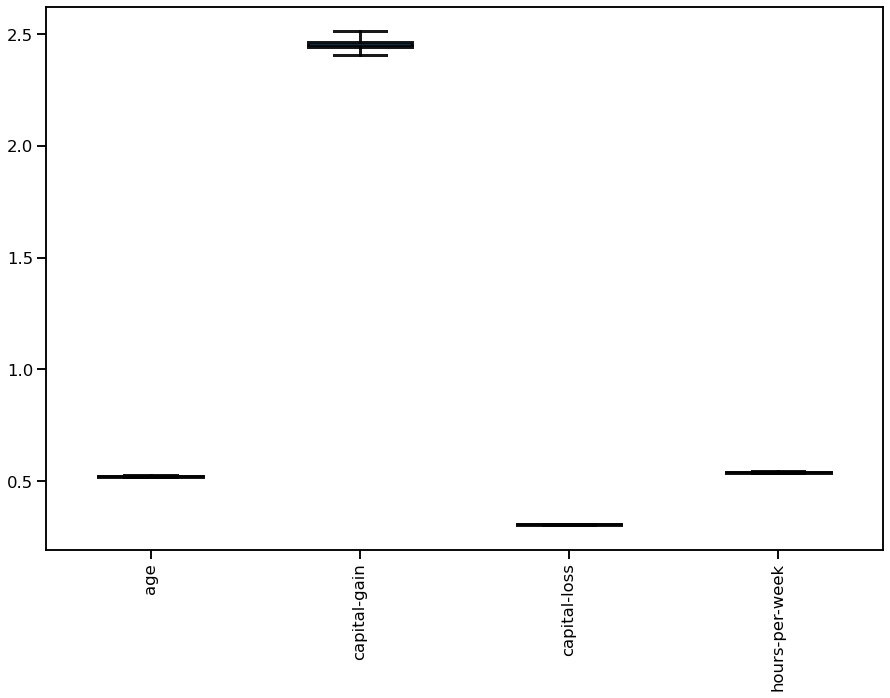

In [28]:
coef = [estimator[-1].coef_[0] for estimator in cv_model_a['estimator']]
coef = pd.DataFrame(coef, columns=data.columns)
_, ax = plt.subplots(figsize=(15, 10))
coef.abs().plot.box(**boxplot_property, ax=ax)

 b) "capital-gain"

Now, we will work with both numerical and categorical features. You can load Adult Census with the following snippet:

In [29]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

## Question 11 
Create a predictive model where the categorical data must be one-hot encoded, the numerical data must be scaled, and the predictor is a logistic regression classifier.

Use the same 10-fold cross-validation strategy as above to evaluate this complex pipeline.

Look at the cross-validation test scores for both models and count the number of times the model using both numerical and categorical features has a better test score than the model using only numerical features.
Select the range which this number belongs to:

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48842 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [31]:
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_features = make_column_selector(dtype_exclude='object')
cat_features = make_column_selector(dtype_include='object')

preprocessing = ColumnTransformer([('numerical', StandardScaler(), num_features),
                                   ('categorical', OneHotEncoder(handle_unknown = 'ignore'), cat_features)])

model_model_c = make_pipeline(preprocessing, LogisticRegression(max_iter = 500))

cv_model_c = cross_validate(model_model_c, data, target, cv = 10)


In [32]:
results = pd.DataFrame(np.stack([cv_model_a['test_score'], cv_model_c['test_score']], axis=1),
                       columns = ['Logistic numeric only', 'Logistic all types'])

results

,Logistic numeric only,Logistic all types
0,0.798567,0.852815
1,0.792835,0.850768
2,0.796683,0.850123
3,0.804873,0.848894
4,0.800369,0.849099
5,0.799140,0.846642
6,0.797502,0.854832
7,0.799345,0.851147
8,0.805078,0.858722
9,0.804054,0.852375


 c) [7, 10]: the model using both numerical and categorical features is substantially better than the model using only numerical features 

In [33]:
## Another way of solving: 

from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = selector(dtype_include=object)(data)
numerical_columns = selector(dtype_exclude=object)(data)

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_columns),
    (StandardScaler(), numerical_columns),
)
model = make_pipeline(preprocessor, LogisticRegression(max_iter=5000))
cv_results = cross_validate(
    model, data, target, cv=10, return_estimator=True, n_jobs=2
)
test_score_complex_lr = cv_results["test_score"]
test_score_complex_lr

array([0.85261003, 0.85076766, 0.85012285, 0.84889435, 0.84889435,
       0.8466421 , 0.8548321 , 0.8511466 , 0.85872236, 0.85257985])

For the following questions, you can use the following snippet to get the feature names after the preprocessing performed.

In [34]:
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["onehotencoder"]
                             .get_feature_names_out(categorical_columns)).tolist()
feature_names += numerical_columns
feature_names

['workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Fa

## Question 12
Which of the following pair of features is most impacting the predictions of the logistic regression classifier based on the relative magnitude of its coefficients?

In [35]:
coef = [estimator[-1].coef_[0] for estimator in cv_results['estimator']]
coef = pd.DataFrame(coef, columns = feature_names)
coef

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,capital-gain,capital-loss,hours-per-week
0,-0.125622,0.697316,0.011636,-0.170934,0.184380,0.338634,-0.354616,-0.168155,-0.422216,-0.814994,...,0.116494,-0.427962,-0.635476,0.364860,-0.630972,0.690792,0.331791,2.369204,0.257329,0.354375
1,-0.100032,0.675633,0.071876,-0.163714,0.202631,0.335140,-0.308633,-0.099700,-0.602752,-0.824842,...,0.095355,-0.430170,-0.453844,0.306957,-0.727224,0.468477,0.337478,2.305709,0.261071,0.355657
2,-0.132666,0.685734,0.048531,-0.137855,0.222474,0.377103,-0.313340,-0.097226,-0.694433,-0.853246,...,0.051668,-0.490361,-0.610849,0.377411,-0.849943,0.820787,0.339699,2.344555,0.261141,0.358426
3,-0.159482,0.654525,0.056745,-0.164098,0.180609,0.321617,-0.351020,-0.109068,-0.438729,-0.788586,...,0.102059,-0.418057,-0.394507,0.321428,-0.856342,0.758110,0.336880,2.357757,0.259262,0.352507
4,-0.172464,0.688089,0.053668,-0.156250,0.186383,0.312981,-0.364184,-0.137029,-0.449360,-0.917983,...,0.244854,-0.511531,-0.650678,0.304896,-0.820361,0.436618,0.333123,2.412225,0.263996,0.358114
5,-0.144137,0.682317,0.020212,-0.164364,0.193265,0.361496,-0.388359,-0.127625,-0.454015,-0.881718,...,0.084573,-0.507893,-0.574414,0.332396,-0.713077,0.465123,0.344214,2.349156,0.254199,0.360784
6,-0.137902,0.694347,0.029907,-0.180482,0.186838,0.321595,-0.374803,-0.127771,-0.404937,-0.801893,...,-0.060354,-0.445514,-0.877684,0.349708,-0.751385,0.678584,0.334817,2.354259,0.256190,0.355077
7,-0.151258,0.634651,0.043467,-0.173652,0.152777,0.284350,-0.370719,-0.146452,-0.296241,-0.839748,...,-0.540820,-0.625541,0.353967,-0.687723,0.756762,0.337913,2.343535,0.262531,0.350965,NaN
8,-0.152987,0.652986,0.035895,-0.169655,0.168332,0.328347,-0.355078,-0.186411,-0.347570,-0.918237,...,0.168665,-0.499795,-0.493761,0.329539,-0.979715,0.665246,0.328436,2.293041,0.264480,0.352411
9,-0.238789,0.615309,-0.010486,-0.026665,0.142173,0.278227,-0.397768,-0.152175,-0.248946,-0.756768,...,0.093314,-0.466959,-0.938544,0.347693,-0.732998,0.882986,0.337652,2.339955,0.257054,0.352020


<AxesSubplot:>

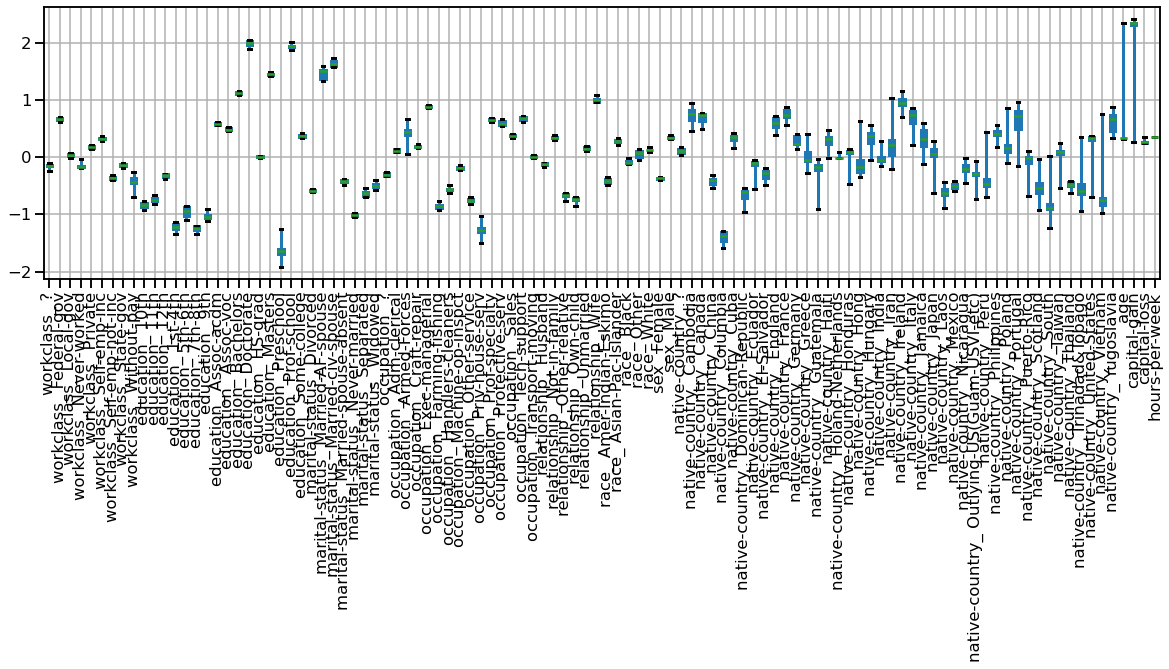

In [36]:
coef.boxplot(rot=90, figsize=(20,5))

In [37]:
coef.abs().median().sort_values(ascending=False)[:10]

capital-gain                          2.346855
education_ Doctorate                  1.998333
education_ Prof-school                1.947594
education_ Preschool                  1.647465
marital-status_ Married-civ-spouse    1.633346
marital-status_ Married-AF-spouse     1.505381
education_ Masters                    1.451358
native-country_ Columbia              1.385817
occupation_ Priv-house-serv           1.267070
education_ 7th-8th                    1.241062
dtype: float64

 c) "capital-gain" and "education_Doctorate" 

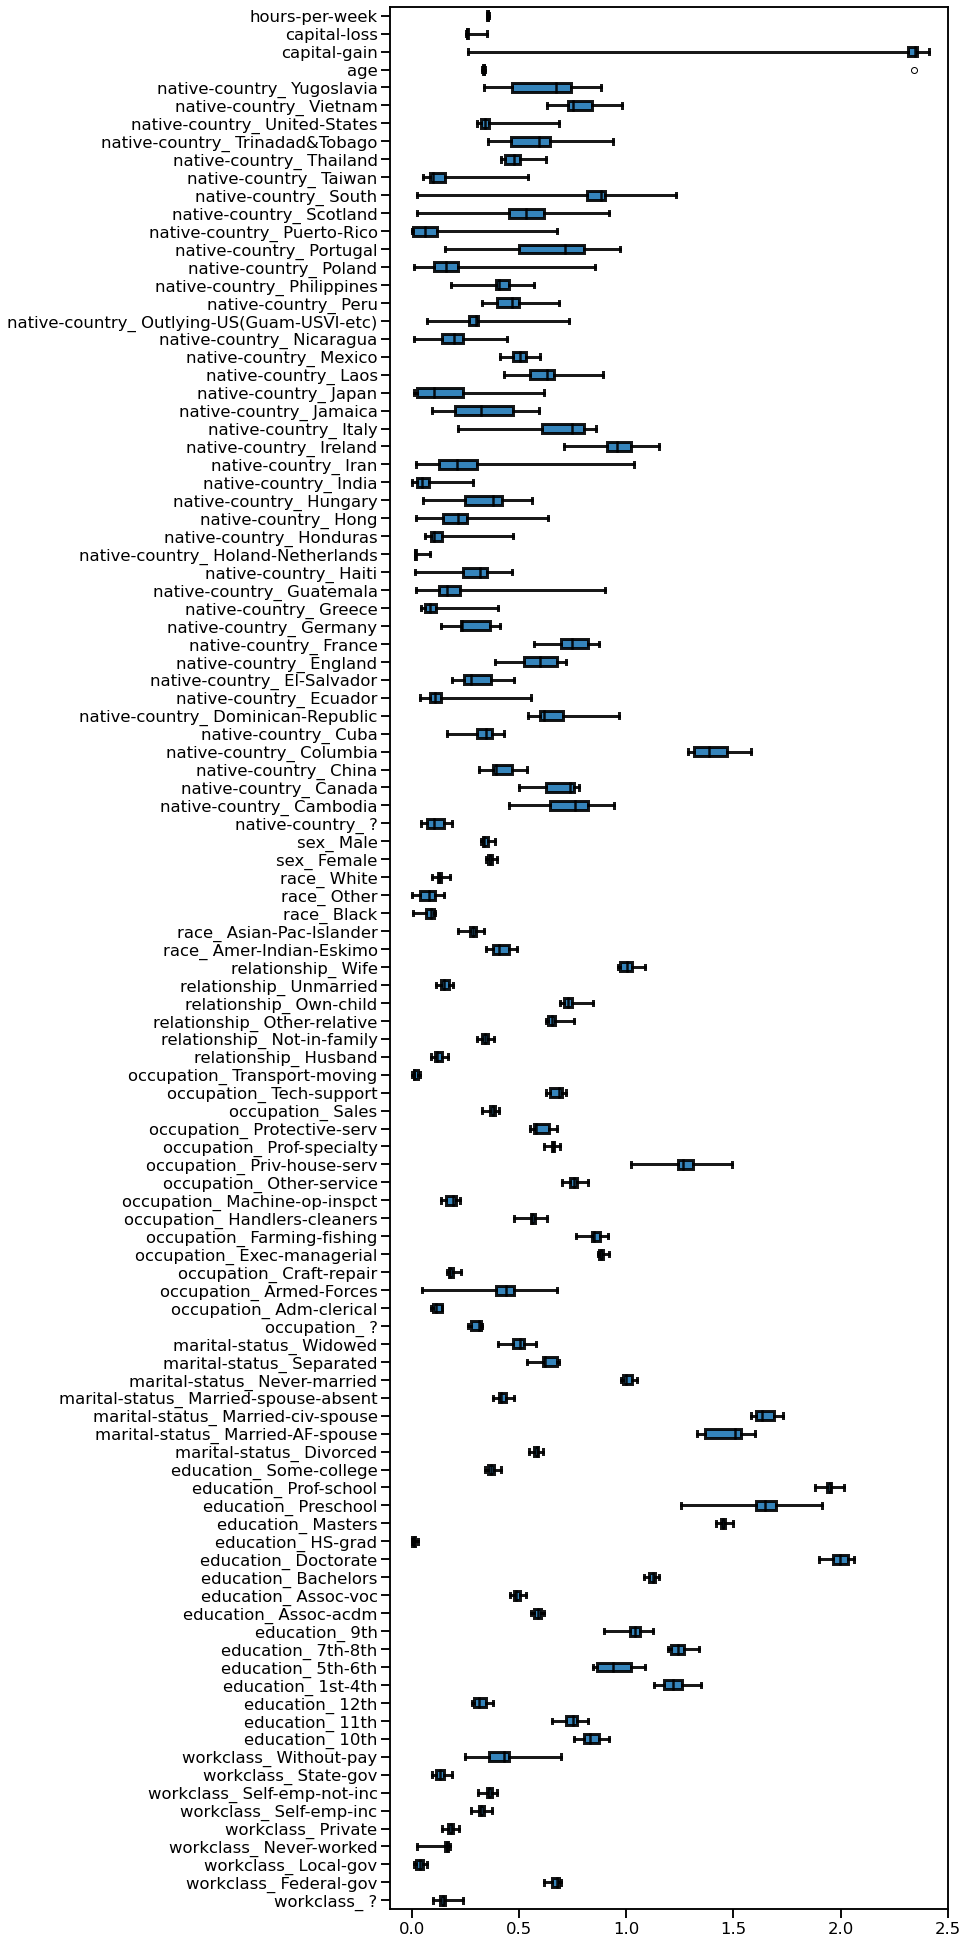

In [38]:
## Another way of solving 

coefs = [pipeline[-1].coef_[0] for pipeline in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)

# Define the style of the box style
boxplot_property = {
    "vert": False,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(10, 35))
ax.set(xlim=(-0.1, 2.5))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

## Question 13
What is the effect of decreasing the C parameter on the coefficients?

 a) shrinking the magnitude of the weights towards zeros
 
 c) reducing the weights' variance
 
 

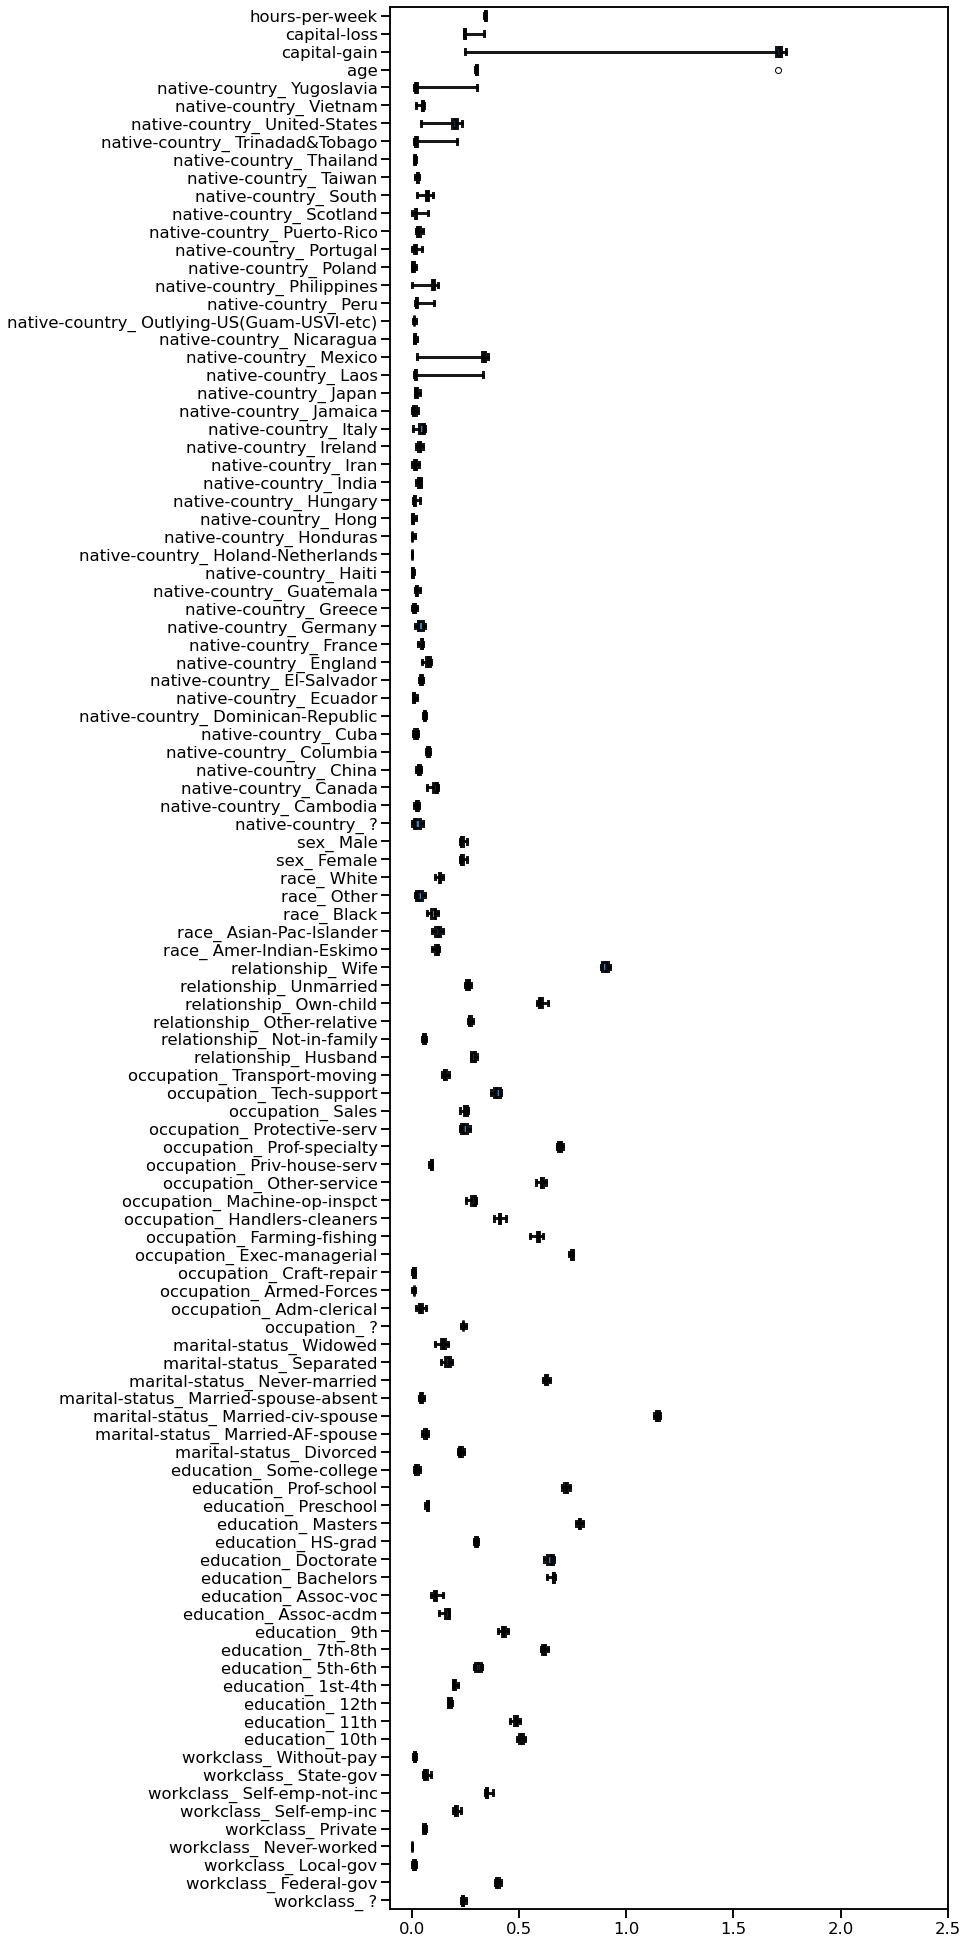

In [39]:
model = make_pipeline(
    preprocessor, LogisticRegression(C=0.01, max_iter=5000)
)
cv_results = cross_validate(
    model, data, target, cv=10, return_estimator=True, n_jobs=2
)
coefs = [pipeline[-1].coef_[0] for pipeline in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)
_, ax = plt.subplots(figsize=(10, 35))
ax.set(xlim=(-0.1, 2.5))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

One can clearly see that, with stronger regularization, (lower value for C), the coefficients are closer to 0 on average. Furthermore, the width of the boxes, that reflects the cross-validation induced variability, has shrunk significantly.